<div style="display: flex; align-items: center;">
    <a href="https://colab.research.google.com/github/aldebaro/dsp-telecom-book-code/blob/master/PythonNotebooks/dsp_107_PowerOfTheSumOfTwoSignals.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 10px;"/>
    </a>
    <a href='https://ai6g.org/books/dsp/Applications.html#textcolor809' target="_blank">
        <img alt='BookStack' src='https://img.shields.io/badge/Open_in _DSP_Book-100000?style=flat&logo=BookStack&logoColor=white&labelColor=696662&color=2095C0' style="height: 25px;"/>
    </a>
</div>


# Application 1.7. Power of the sum of two signals.

Assume a signal $z[n]=x[n]+y[n]$ is generated by summing two real signals (similar result can be obtained for
complex-valued signals) $x[n]$ and $y[n]$ with power $P_x$ and $P_y$. 

The question is: What is the condition for having $P_z = P_x + P_y$?

Assuming the two signals are random and using expected values (a similar result
would hold for deterministic signals):

\begin{equation}
P_Z = E[Z^2] = E[(X + Y)^2] = P_X + P_Y + 2E[XY] \tag{1}
\end{equation}

If $X$ and $Y$ are uncorrelated, i. e., $E[XY] = E[X]E[Y]$ and at least one signal is zero-mean, Equation 1 simplifies to

\begin{equation}
P_z = P_x + P_y \tag{2}
\end{equation}

In the code cell below, we can demonstrate the application of the signal power concept in practice.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the power of a discrete signal
def calculate_power(signal):
    return np.mean(np.square(signal))

# Function to generate signals and calculate the power of the sum
def generate_signals_and_calculate_power(mean_x, mean_y, power_x, power_y, n_samples=1000):
    n = np.arange(n_samples)

    # Generate random signals
    x = np.random.normal(mean_x, np.sqrt(power_x), n_samples)
    y = np.random.normal(mean_y, np.sqrt(power_y), n_samples)

    # Sum of the signals
    z = x + y

    # Calculate powers
    power_z = calculate_power(z)

    # Calculate covariance between X and Y
    covariance_xy = np.mean(x * y)

    # Calculate the expression Pz = Px + Py + 2E[XY]
    expected_power_z = power_x + power_y + 2 * covariance_xy

    # Plot the signals
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(n, x)
    plt.title('Signal x[n]')

    plt.subplot(4, 1, 2)
    plt.plot(n, y)
    plt.title('Signal y[n]')

    plt.subplot(4, 1, 3)
    plt.plot(n, z)
    plt.title('Sum x[n] + y[n]')

    plt.subplot(4, 1, 4)
    labels = ['Power x[n]', 'Power y[n]', 'Power x[n]+y[n]', 'E[Z²]']
    values = [power_x, power_y, power_z, expected_power_z]
    plt.stem(labels, values)
    plt.title('Comparison of Powers and E[Z²]')

    plt.tight_layout()
    plt.show()

    print(f'Power of x[n]: {power_x}')
    print(f'Power of y[n]: {power_y}')
    print(f'Power of x[n] + y[n]: {power_z}')
    print(f'E[Z²]: {expected_power_z}')


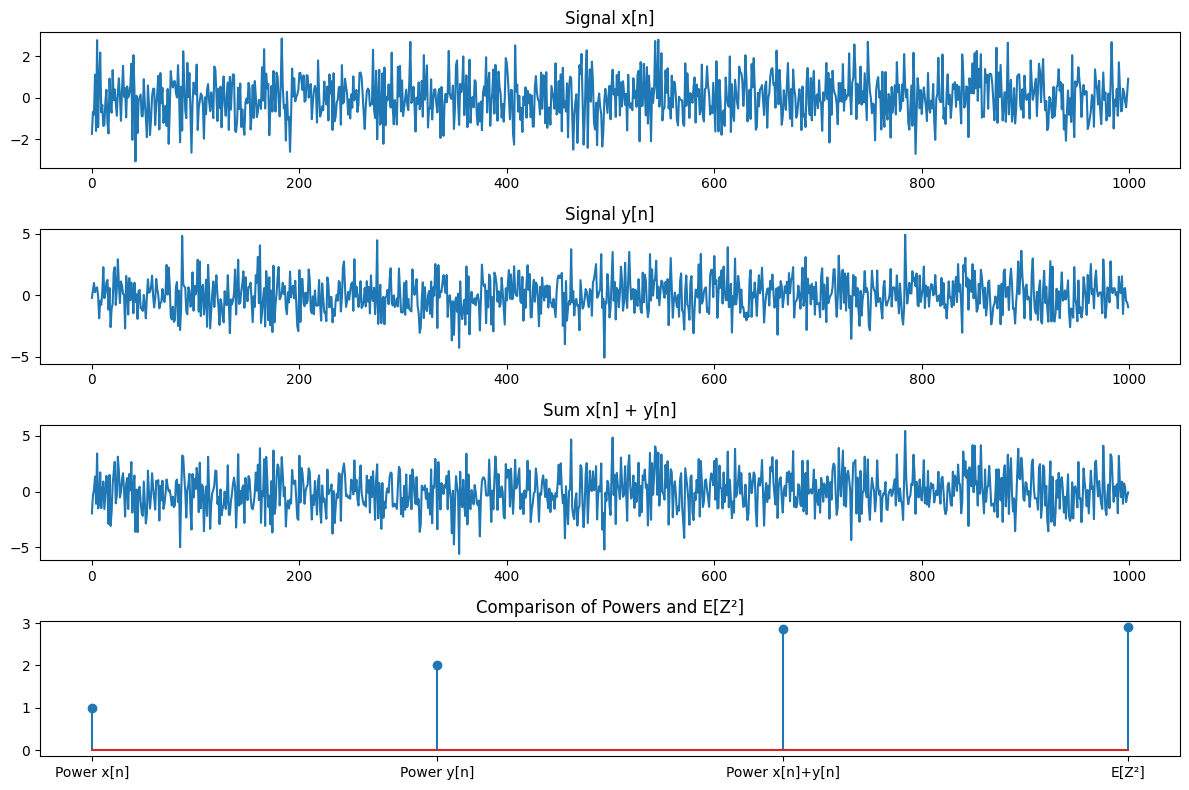

Power of x[n]: 1
Power of y[n]: 2
Power of x[n] + y[n]: 2.869623760996997
E[Z²]: 2.903094146586347


In [3]:

# Signal parameters
mean_x, mean_y = 0, 0
power_x, power_y = 1, 2

# Call the function to generate signals and calculate powers
generate_signals_and_calculate_power(mean_x, mean_y, power_x, power_y)


The code above:

- Generates a random signal $x[n]$  
- Generates a random signal $y[n]$
- Add the signals to form $z[n]=x[n]+y[n]$
- Plots the signals and compares the strengths of the individual signals and the theoretical expression $ P_Z = E[Z^2] = E[(X + Y)^2] = P_X + P_Y + 2E[XY]$


This provides a clear visualization of the relationship between the strengths of individual signals and the power of the sum, especially when the signals are uncorrelated. This scenario is common in communication channel models where noise is considered additive and not correlated to the transmitted signal and Equation 2 applies.
